In [1]:
import BAW

In [2]:
BAW_deltas = []
for k in range(375, 425, 1):
    option_style_flag = 'American'
    output_flag = 'Delta'
    option_type_flag = 'Call'
    spot_price = 409.19
    strike_price = k
    expiration_time_in_years = 48/365
    interest_rate_dec_pa = 0.0416
    carry_rate_dec_pa = 0.0161
    volatility_dec_pa = 0.15

    spy = BAW.getValue(option_style_flag, output_flag, option_type_flag, spot_price, strike_price, expiration_time_in_years,
                       interest_rate_dec_pa, carry_rate_dec_pa, volatility_dec_pa)
    BAW_deltas.append(round(spy,2))

print(BAW_deltas)

[0.95, 0.94, 0.94, 0.93, 0.93, 0.92, 0.91, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.81, 0.8, 0.79, 0.77, 0.76, 0.75, 0.73, 0.72, 0.7, 0.68, 0.67, 0.65, 0.63, 0.62, 0.6, 0.58, 0.56, 0.55, 0.53, 0.51, 0.49, 0.47, 0.46, 0.44, 0.42, 0.4, 0.39, 0.37, 0.35, 0.34, 0.32, 0.31, 0.29, 0.28]


In [3]:
from py_vollib_vectorized import price_dataframe
import pandas as pd

BS_deltas = []
for i in range(375, 425, 1):
    option = pd.DataFrame()
    option['Flag'] = ['c']  # 'c' for call
    option['S'] = 409.19  # Underlying asset price
    option['K'] = i  # Strike(s)
    option['T'] = 48/365  # (Annualized) time-to-expiration
    option['R'] = 0.0416 # Interest free rate
    option['IV'] = 0.15  # Implied Volatility
    option['Q'] = 0.0161 # Dividend yield [OPTIONAL]
    result = price_dataframe(option, flag_col='Flag', underlying_price_col='S', strike_col='K',
                             annualized_tte_col='T', dividend_col='Q',
                             riskfree_rate_col='R', sigma_col='IV', model='black',
                             inplace=False)
    BS_deltas.append(round(result['delta'][0],2))

print(BS_deltas)

[0.96, 0.95, 0.95, 0.94, 0.94, 0.93, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.88, 0.87, 0.85, 0.84, 0.83, 0.82, 0.81, 0.79, 0.78, 0.77, 0.75, 0.74, 0.72, 0.71, 0.69, 0.67, 0.66, 0.64, 0.62, 0.61, 0.59, 0.57, 0.55, 0.54, 0.52, 0.5, 0.48, 0.47, 0.45, 0.43, 0.41, 0.4, 0.38, 0.36, 0.35, 0.33, 0.31, 0.3]


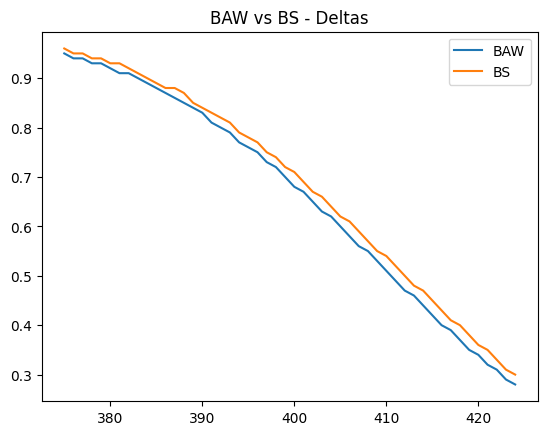

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(375, 425, 1)
plt.plot(x, BAW_deltas, label='BAW')
plt.plot(x, BS_deltas, label='BS')
plt.title('BAW vs BS - Deltas')
plt.legend()
plt.show()

In [5]:
BAW_prices = []
for k in range(375, 425, 1):
    option_style_flag = 'American'
    output_flag = 'Value'
    option_type_flag = 'Call'
    spot_price = 409.19
    strike_price = k
    expiration_time_in_years = 48/365
    interest_rate_dec_pa = 0.0416
    carry_rate_dec_pa = 0.0161
    volatility_dec_pa = 0.15

    spy = BAW.getValue(option_style_flag, output_flag, option_type_flag, spot_price, strike_price, expiration_time_in_years,
                       interest_rate_dec_pa, carry_rate_dec_pa, volatility_dec_pa)
    BAW_prices.append(round(spy,2))

print(BAW_prices)

[35.31, 34.37, 33.44, 32.51, 31.59, 30.68, 29.77, 28.87, 27.98, 27.1, 26.23, 25.37, 24.52, 23.68, 22.85, 22.03, 21.23, 20.44, 19.66, 18.9, 18.15, 17.42, 16.7, 15.99, 15.31, 14.64, 13.98, 13.35, 12.73, 12.12, 11.54, 10.97, 10.42, 9.89, 9.37, 8.88, 8.4, 7.94, 7.49, 7.07, 6.66, 6.27, 5.89, 5.53, 5.19, 4.87, 4.56, 4.26, 3.98, 3.71]


In [6]:
BS_prices = []
for i in range(375, 425, 1):
    option = pd.DataFrame()
    option['Flag'] = ['c']  # 'c' for call
    option['S'] = 409.19  # Underlying asset price
    option['K'] = i  # Strike(s)
    option['T'] = 48/365  # (Annualized) time-to-expiration
    option['R'] = 0.0416 # Interest free rate
    option['IV'] = 0.15  # Implied Volatility
    option['Q'] = 0.0161 # Dividend yield [OPTIONAL]
    result = price_dataframe(option, flag_col='Flag', underlying_price_col='S', strike_col='K',
                             annualized_tte_col='T', dividend_col='Q',
                             riskfree_rate_col='R', sigma_col='IV', model='black',
                             inplace=False)
    BS_prices.append(round(result['Price'][0],2))

print(BS_prices)

[34.68, 33.74, 32.81, 31.88, 30.96, 30.05, 29.14, 28.25, 27.36, 26.48, 25.61, 24.76, 23.91, 23.07, 22.25, 21.44, 20.64, 19.86, 19.09, 18.33, 17.59, 16.87, 16.16, 15.47, 14.79, 14.13, 13.48, 12.86, 12.25, 11.66, 11.09, 10.53, 9.99, 9.47, 8.97, 8.49, 8.02, 7.57, 7.14, 6.73, 6.34, 5.96, 5.59, 5.25, 4.92, 4.6, 4.31, 4.02, 3.75, 3.5]


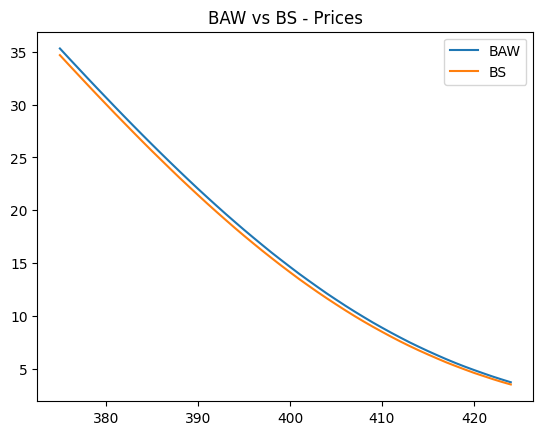

In [7]:
x = np.arange(375, 425, 1)
plt.plot(x, BAW_prices, label='BAW')
plt.plot(x, BS_prices, label='BS')
plt.title('BAW vs BS - Prices')
plt.legend()
plt.show()

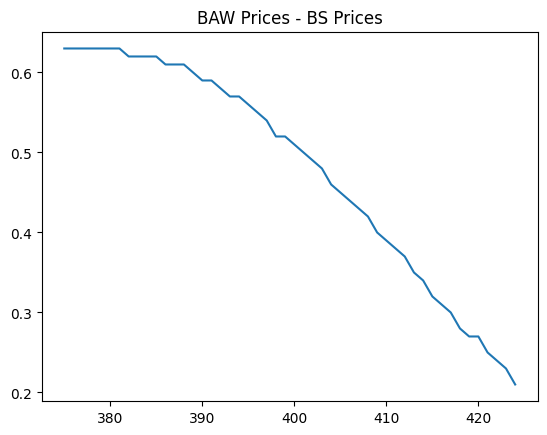

In [9]:
# plot the differences between BAW and BS Prices for each strike
x = np.arange(375, 425, 1)
plt.plot(x, np.array(BAW_prices) - np.array(BS_prices))
plt.title('BAW Prices - BS Prices')
plt.show()